In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)
sns.set_palette("flare")

In [3]:
clean_data_3 = pd.read_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/clean_seven_participants_3.csv")

In [4]:
clean_data_3.groupby("Collider_Categorical")["SubjectID"].count()

Collider_Categorical
Active_Agent                 100031
Background                  3879113
Building                    1258856
Global_Landmark               55761
Passive_Agent                 77281
TaskBuilding_Public          438373
TaskBuilding_Residential     191862
Name: SubjectID, dtype: int64

In [ ]:
complete_data = pd.read_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Data_Complete.csv")

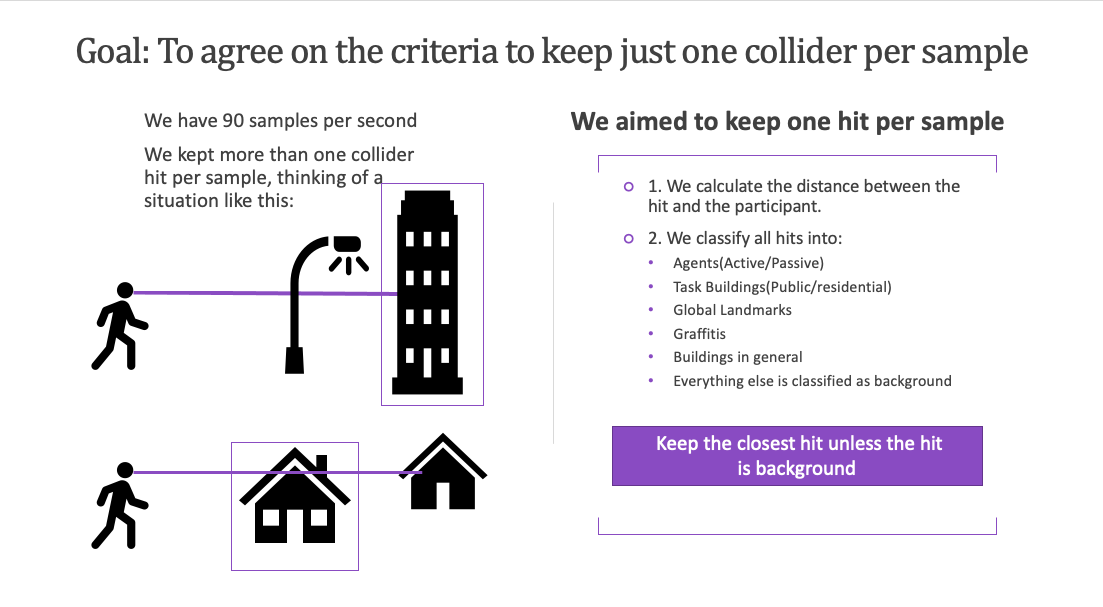

In [5]:
%matplotlib inline
from IPython.display import Image
Image('/Users/tracysanchezpacheco/Desktop/pipeline.png')

<AxesSubplot:xlabel='SubjectID', ylabel='count'>

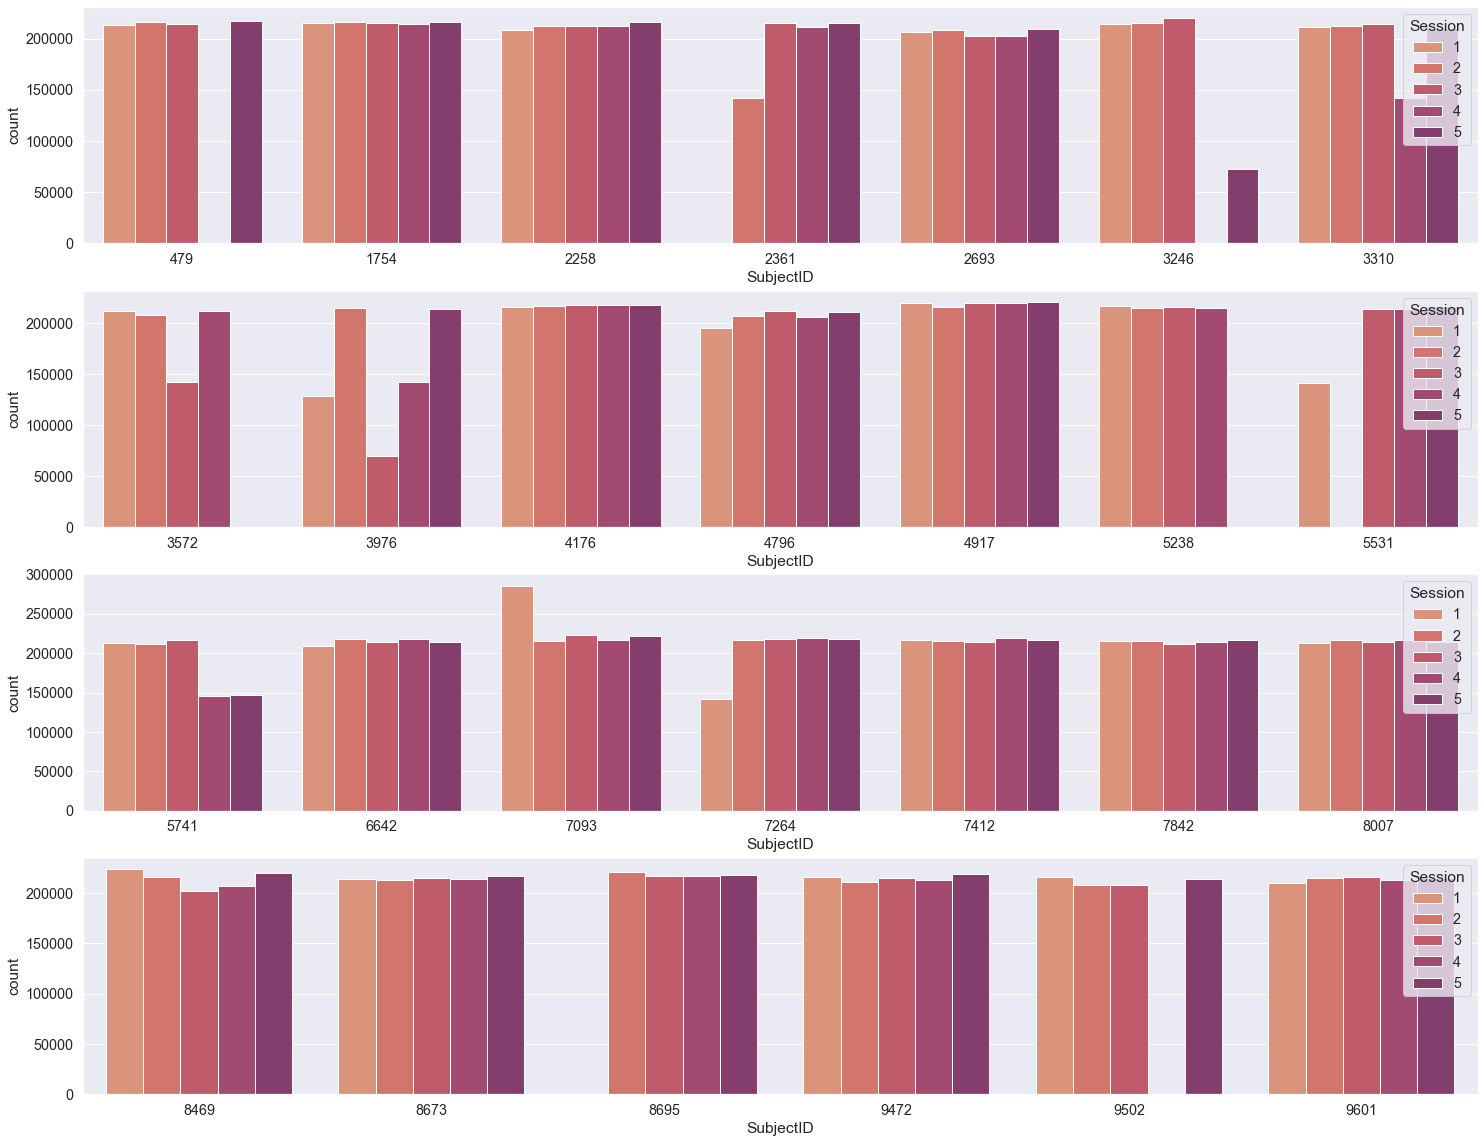

In [6]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25, 20))
sns.countplot(data=clean_data, x="SubjectID", hue="Session", ax=axes[0])
sns.countplot(data=clean_data_1, x="SubjectID", hue="Session", ax=axes[1])
sns.countplot(data=clean_data_2, x="SubjectID", hue="Session", ax=axes[2])
sns.countplot(data=clean_data_3, x="SubjectID", hue="Session", ax=axes[3])
#90*60*30 = 162000 I have around 112 frames per second but this is not stable (some missing data for some participants)

In [7]:
Categories_Names = pd.DataFrame(complete_data.groupby(["Collider_Categorical", "hitObjectColliderName"])["SubjectID"].count())
Categories_Names.reset_index(inplace=True)
Categories_Names.rename(columns={"SubjectID": "Count"}, inplace=True)

In [8]:
Categories_Names

,Collider_Categorical,hitObjectColliderName,Count
0,Active_Agent,01_Cma,24482
1,Active_Agent,02_Cma,25056
2,Active_Agent,03_Cma,11616
3,Active_Agent,04_Cma,2135
4,Active_Agent,05_Cma,6498
...,...,...,...
1057,TaskBuilding_Residential,TaskBuilding_43,29880
1058,TaskBuilding_Residential,TaskBuilding_46,43610
1059,TaskBuilding_Residential,TaskBuilding_48,38510
1060,TaskBuilding_Residential,TaskBuilding_6,47860


In [9]:
pd.set_option('display.max_rows', 5000)
Categories_Names[Categories_Names.Collider_Categorical == "Background"]

,Collider_Categorical,hitObjectColliderName,Count
28,Background,08_CmANo_15_50,4
29,Background,09_CmA_16_45,2
30,Background,Arabic_v1_ceiling,333
31,Background,Arabic_v1_floor,2818
32,Background,Bench_v1,9560
33,Background,Bench_v1 (1),7129
34,Background,Bench_v1 (10),992
35,Background,Bench_v1 (2),6457
36,Background,Bench_v1 (3),8116
37,Background,Bench_v1 (4),3787


In [10]:
Categories_Sum = pd.DataFrame(complete_data.groupby(["Collider_Categorical"])["SubjectID"].count())
Categories_Sum.reset_index(inplace=True)
Categories_Sum.rename(columns={"SubjectID": "Count"}, inplace=True)

In [11]:
Categories_Sum.sort_values(by="Count", ascending=False)

,Collider_Categorical,Count
1,Background,16520327
2,Building,5615821
6,TaskBuilding_Public,1933514
4,Graffity,808827
7,TaskBuilding_Residential,510751
0,Active_Agent,406420
5,Passive_Agent,304301
3,Global_Landmark,252429


In [12]:
Categories_Subject_Session = pd.DataFrame(complete_data.groupby(["Collider_Categorical", "SubjectID", "Session"])["hitObjectColliderName"].count())
Categories_Subject_Session.reset_index(inplace=True)
Categories_Subject_Session.rename(columns={"hitObjectColliderName": "Count"}, inplace=True)

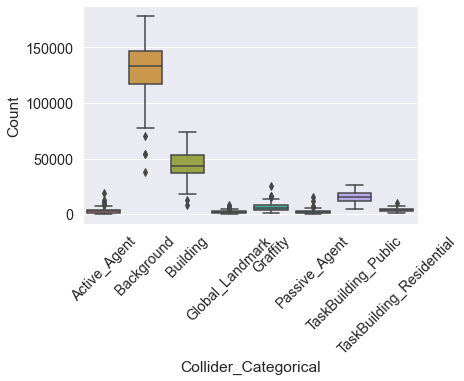

In [13]:
sns.set_palette("flare")
g = sns.boxplot(data=Categories_Subject_Session, x="Collider_Categorical", y="Count")
plt.xticks(rotation = 45);

In [14]:
Only_Relevant = Categories_Subject_Session[(Categories_Subject_Session.Collider_Categorical != "Background") & (Categories_Subject_Session.Collider_Categorical != "Building") ]

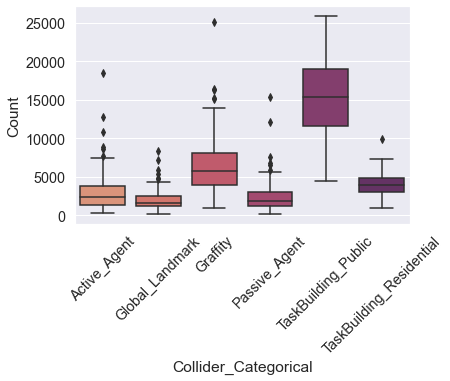

In [15]:
sns.set_palette("flare")
g = sns.boxplot(data=Only_Relevant, x="Collider_Categorical", y="Count")
plt.xticks(rotation = 45);

In [16]:
Pivot_Categories_PerSubject_PerSession = pd.DataFrame(Categories_PerSubject_PerSession.pivot_table(index='SubjectID', columns= [ 'Collider_Categorical'], values='hitObjectColliderName'))


NameError: name 'Categories_PerSubject_PerSession' is not defined

In [ ]:
Pivot_Categories_PerSubject_PerSession.info()

In [ ]:
Pivot_Categories_PerSubject_PerSession.head()

In [ ]:
g = sns.catplot(
    data=Categories_PerSubject_PerSession, x="Collider_Categorical", y="hitObjectColliderName", col="SubjectID", col_wrap= 2,
    kind="bar"
)
g.set_titles("{col_name} {col_var}")


In [ ]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25, 20))
sns.countplot(data=clean_data, x="SubjectID", hue="Session", ax=axes[0])
sns.countplot(data=clean_data_1, x="SubjectID", hue="Session", ax=axes[1])
sns.countplot(data=clean_data_2, x="SubjectID", hue="Session", ax=axes[2])
sns.countplot(data=clean_data_3, x="SubjectID", hue="Session", ax=axes[3])

In [ ]:
The_perfect_Set = clean_data[(clean_data['SubjectID'] == 1754) | (clean_data['SubjectID'] == 2258) | (clean_data['SubjectID'] == 2693)]
The_perfect_Set_1 = clean_data_1[(clean_data_1['SubjectID'] == 4176) | (clean_data_1['SubjectID'] == 4796) | (clean_data_1['SubjectID'] == 4917) | (clean_data_1['SubjectID'] == 5238)]
The_perfect_Set_2 = clean_data_2[(clean_data_2['SubjectID'] == 6642) | (clean_data_2['SubjectID'] == 7412) | (clean_data_2['SubjectID'] == 7842) | (clean_data_2['SubjectID'] == 8007)]
The_perfect_Set_3 = clean_data_3[(clean_data_3['SubjectID'] == 8469) | (clean_data_3['SubjectID'] == 8673) | (clean_data_3['SubjectID'] == 9472) | (clean_data_3['SubjectID'] == 9601)]

In [10]:
result.head()


,index,SubjectID,Session,SessionSubsection,timeStampDataPointStart,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,...,hitColliderType,hitObjectColliderName,ordinalOfHit,hitPointOnObject_x,hitPointOnObject_y,hitPointOnObject_z,Eucledian_distance,Collider_Categorical,Previous_Euclidean_value,Collider_stays
0,121419,479,1,1,1.652967e+09,1.652967e+09,3,-59.122986,2.413162,34.732815,...,UnityEngine.MeshCollider,TaskBuilding_35,1.0,-63.126041,2.384691,44.754692,10.849845,TaskBuilding_Public,NaN,False
1,121421,479,1,1,1.652967e+09,1.652967e+09,3,-59.122986,2.413162,34.732815,...,UnityEngine.MeshCollider,TaskBuilding_35,1.0,-63.126041,2.384691,44.754692,10.849845,TaskBuilding_Public,70.415145,False
2,121423,479,1,1,1.652967e+09,1.652967e+09,3,-59.119831,2.413259,34.732769,...,UnityEngine.MeshCollider,TaskBuilding_35,1.0,-63.102364,2.409164,44.764919,10.853945,TaskBuilding_Public,70.415145,False
3,121425,479,1,1,1.652967e+09,1.652967e+09,3,-59.135059,2.412430,34.733551,...,UnityEngine.MeshCollider,TaskBuilding_35,1.0,-63.168682,2.391426,44.736275,10.849811,TaskBuilding_Public,70.281814,False
4,121427,479,1,1,1.652967e+09,1.652967e+09,3,-59.135059,2.412407,34.733528,...,UnityEngine.MeshCollider,TaskBuilding_35,1.0,-63.168106,2.389861,44.736523,10.849602,TaskBuilding_Public,70.635729,False
